1. train.csv / test.csv : 타이타닉 탑승자들 중 일부의 인적 정보와 생존 여부 데이터
 - PassengerID : 탑승객 고유 아이디
 - Survival : 탑승객 생존 유무 (0: 사망, 1: 생존)
 - Pclass : 등실의 등급
 - Name : 이름
 - Sex : 성별
 - Age : 나이
 - Sibsp : 함께 탐승한 형제자매, 아내, 남편의 수
 - Parch : 함께 탐승한 부모, 자식의 수
 - Ticket :티켓 번호
 - Fare : 티켓의 요금
 - Cabin : 객실번호
 - Embarked : 배에 탑승한 항구 이름 ( C = Cherbourn, Q = Queenstown, S = Southampton)
 
 2. survived 예측값
 - Pclass(등실 등급), Sex(성별), Age(나이), Sibsp(함꼐 탑승한 형제자매, 아내, 남편의 수), Parch(함께 탑승한 부모, 자식의 수) 정도 예측

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
train = pd.read_csv('../study_2/train.csv') # 현 디렉토리는 . / 하위 디렉토리는 ..으로 이동

In [9]:
test = pd.read_csv('../study_2/test.csv')

In [10]:
submission = pd.read_csv('../study_2/submission.csv')

In [11]:
print(train.head())
print(test.head())
print(submission.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [12]:
print(train.describe())
print(test.describe())
print(submission.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

In [13]:
print(train.describe(include='object'))
print(test.describe(include='object'))

                                  Name   Sex  Ticket    Cabin Embarked
count                              891   891     891      204      889
unique                             891     2     681      147        3
top     Cunningham, Mr. Alfred Fleming  male  347082  B96 B98        S
freq                                 1   577       7        4      644
                           Name   Sex    Ticket            Cabin Embarked
count                       418   418       418               91      418
unique                      418     2       363               76        3
top     Burns, Miss. Mary Delia  male  PC 17608  B57 B59 B63 B66        S
freq                          1   266         5                3      270


In [14]:
print(train.shape) #열, 행 확인
print(test.shape)
print(submission.shape)

(891, 12)
(418, 11)
(418, 2)


In [15]:
print(train.info())
print(test.info())
print(submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

### 좌석 등급별 생존율

In [16]:
train[['Pclass','Survived']].groupby('Pclass').mean().sort_values('Survived')

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


In [17]:
pd.set_option('display.max_rows',None) #모든 행 보기

In [18]:
print(train[['Age', 'Survived']].groupby('Age').mean().sort_values('Age'))

       Survived
Age            
0.42   1.000000
0.67   1.000000
0.75   1.000000
0.83   1.000000
0.92   1.000000
1.00   0.714286
2.00   0.300000
3.00   0.833333
4.00   0.700000
5.00   1.000000
6.00   0.666667
7.00   0.333333
8.00   0.500000
9.00   0.250000
10.00  0.000000
11.00  0.250000
12.00  1.000000
13.00  1.000000
14.00  0.500000
14.50  0.000000
15.00  0.800000
16.00  0.352941
17.00  0.461538
18.00  0.346154
19.00  0.360000
20.00  0.200000
20.50  0.000000
21.00  0.208333
22.00  0.407407
23.00  0.333333
23.50  0.000000
24.00  0.500000
24.50  0.000000
25.00  0.260870
26.00  0.333333
27.00  0.611111
28.00  0.280000
28.50  0.000000
29.00  0.400000
30.00  0.400000
30.50  0.000000
31.00  0.470588
32.00  0.500000
32.50  0.500000
33.00  0.400000
34.00  0.400000
34.50  0.000000
35.00  0.611111
36.00  0.500000
36.50  0.000000
37.00  0.166667
38.00  0.454545
39.00  0.357143
40.00  0.461538
40.50  0.000000
41.00  0.333333
42.00  0.461538
43.00  0.200000
44.00  0.333333
45.00  0.416667
45.50  0

In [19]:
print(train[['SibSp','Survived']].groupby('SibSp').mean().sort_values('Survived',ascending=False))
print(train[['Parch','Survived']].groupby('Parch').mean().sort_values('Survived', ascending=False))
print(train[['Sex_male','Survived']].groupby('Sex_male').mean().sort_values('Survived',ascending=False))
print(train[['Age','Survived']].groupby('Age').mean().sort_values('Survived',ascending=False))
print(train[['Age','Sex_male']].groupby('Age').mean().sort_values('Sex_male',ascending=False))

       Survived
SibSp          
1      0.535885
2      0.464286
0      0.345395
3      0.250000
4      0.166667
5      0.000000
8      0.000000
       Survived
Parch          
3      0.600000
1      0.550847
2      0.500000
0      0.343658
5      0.200000
4      0.000000
6      0.000000


KeyError: "['Sex_male'] not in index"

In [61]:
print(train)

<function train at 0x000001B133EEE430>


In [20]:
print(train.isna().sum())
print(test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [21]:
train.dropna(subset=['Embarked'], how='any', inplace=True)

In [22]:
test.dropna(subset=['Fare'], how='any', inplace=True)

In [23]:
train['Age'].fillna(train['Age'].mean(), inplace = True)

In [24]:
test['Age'].fillna(test['Age'].mean(), inplace = True)

### 문자열 바꾸기...? -> 더미변수가 나을 듯

In [31]:
train['Sex'] = train['Sex'].str.replace('male','0')

In [32]:
train['Sex'] = train['Sex'].str.replace('Female', '1')

In [33]:
test['Sex'] = test['Sex'].str.replace('male', '0')
test['Sex'] = test['Sex'].str.replace('Female', '1')

### 더미변수 만들기

In [25]:
train = pd.get_dummies(train, columns= ['Sex', 'Embarked'], drop_first=True) #drop_first -> 가변수 하나만 사용, K개의 범주형 컬럼 개수에서 K개의 가변수를 만들면 회귀모형에서 문제가 됨

In [26]:
test = pd.get_dummies(test, columns= ['Sex', 'Embarked'], drop_first = True)

In [27]:
train.drop(labels=['Cabin', 'Ticket'], axis = 1, inplace=True)

In [28]:
test.drop(labels=['Cabin', 'Ticket'], axis = 1, inplace=True)

In [29]:
print(train)
print(test)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

In [30]:
import seaborn as sns

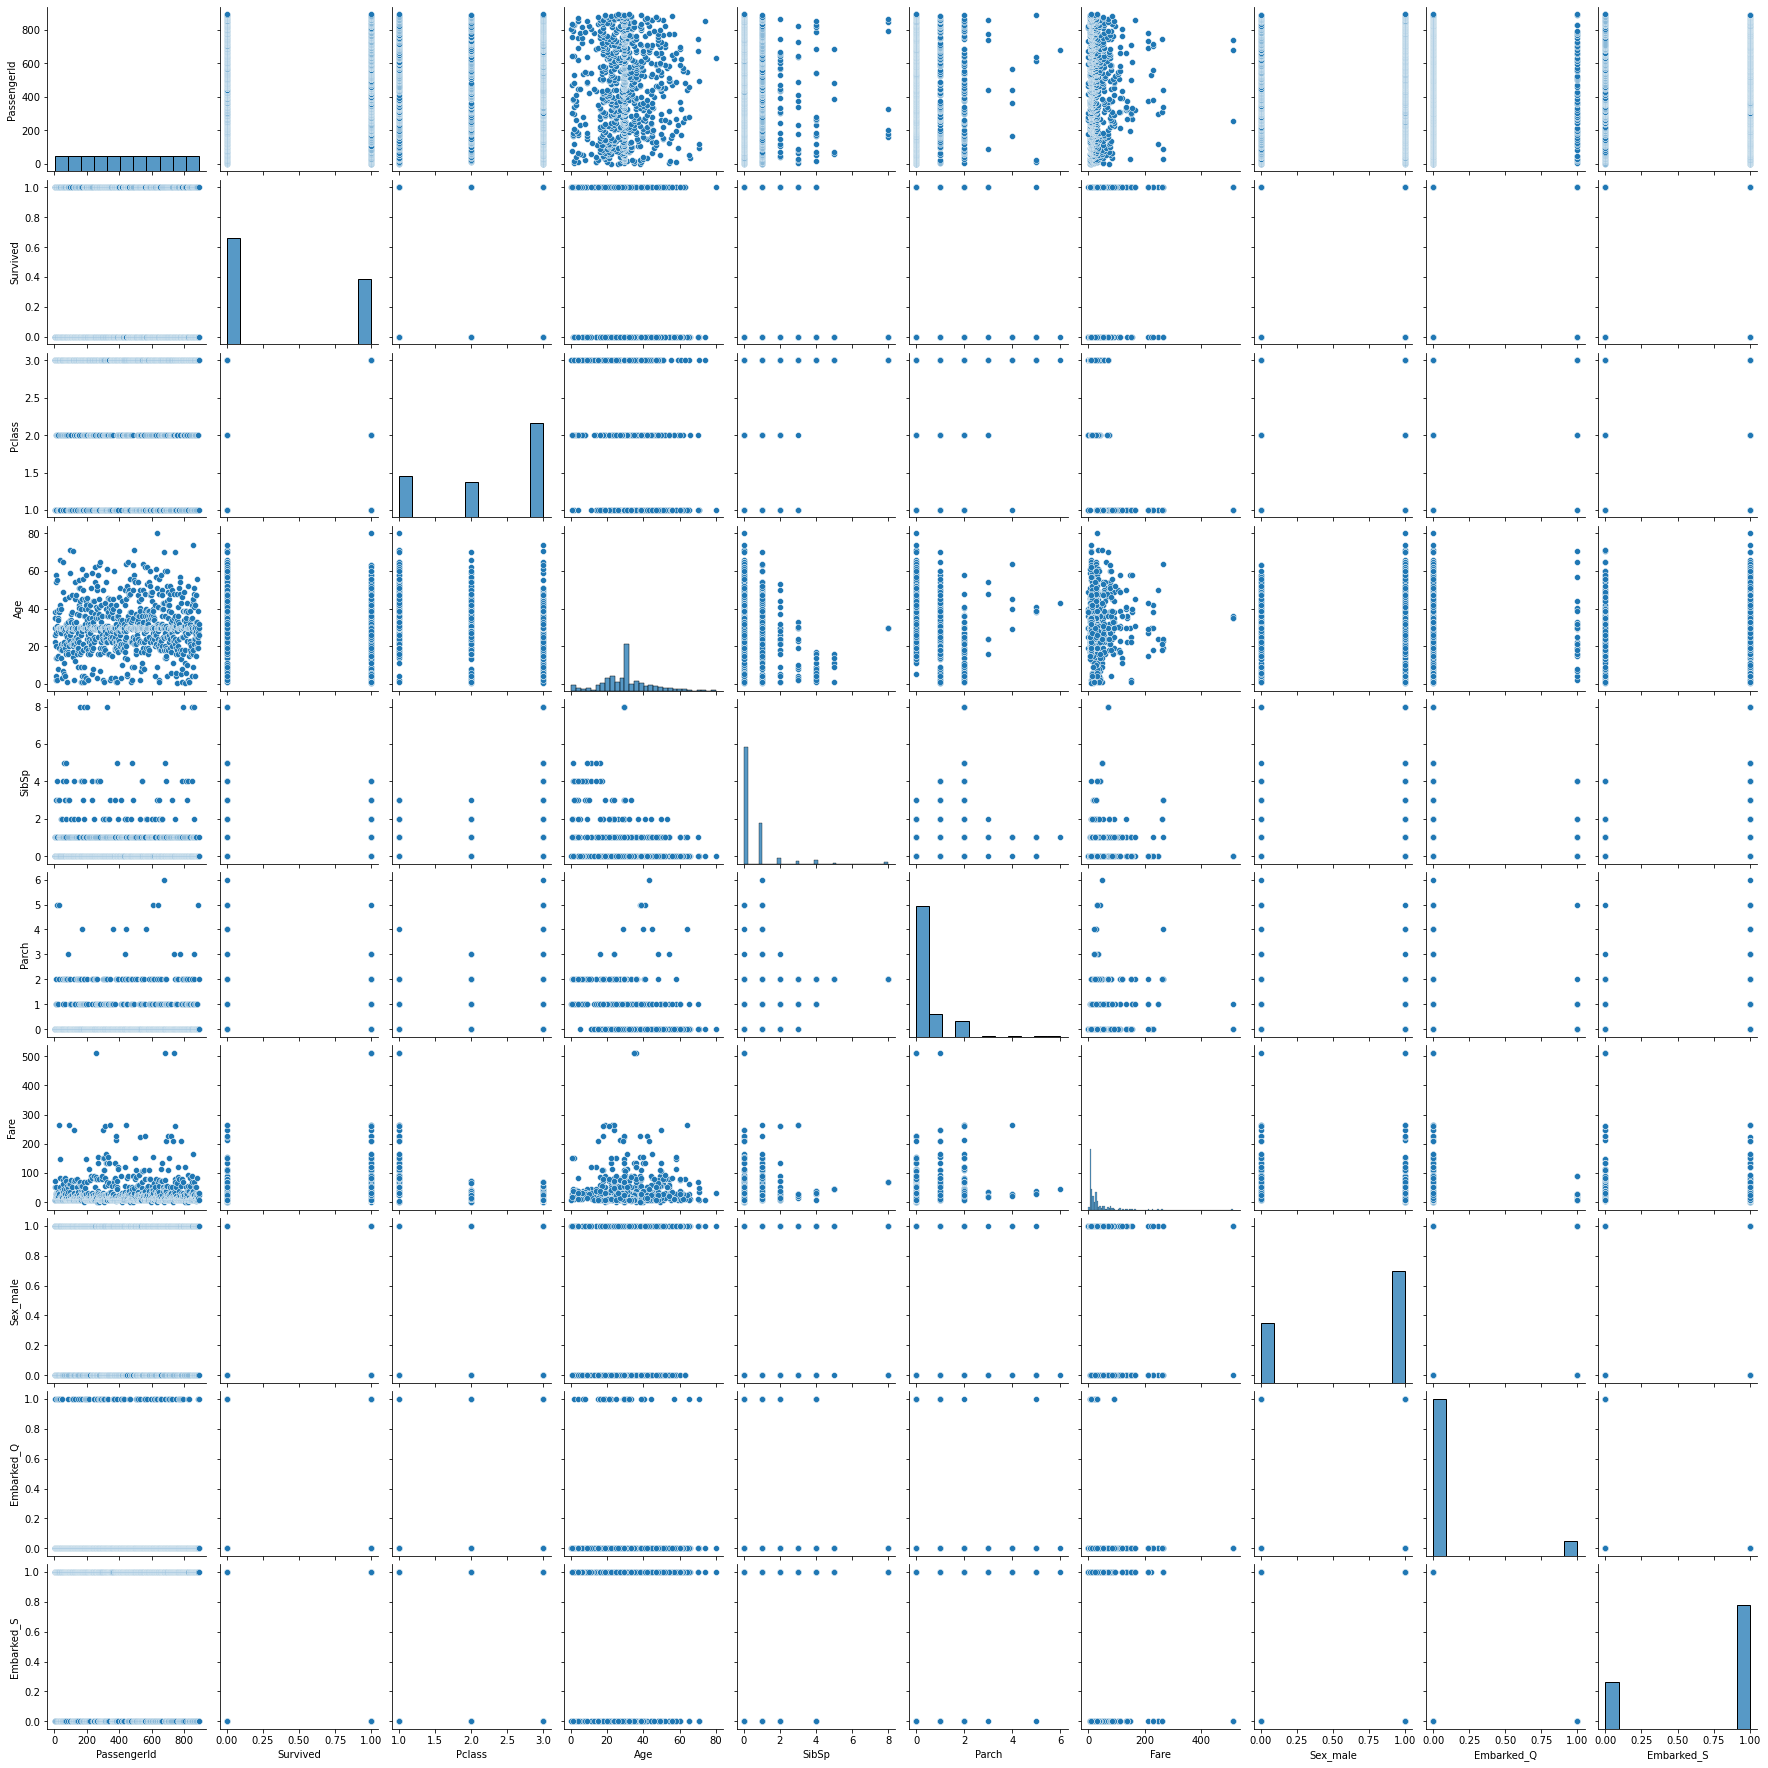

In [31]:
sns.pairplot(train, diag_kind='hist')
plt.show()

In [32]:
print(train.corr())
print(test.corr())

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005028 -0.035330  0.030335 -0.057686 -0.001657   
Survived       -0.005028  1.000000 -0.335549 -0.074513 -0.034040  0.083151   
Pclass         -0.035330 -0.335549  1.000000 -0.328256  0.081656  0.016824   
Age             0.030335 -0.074513 -0.328256  1.000000 -0.231908 -0.178013   
SibSp          -0.057686 -0.034040  0.081656 -0.231908  1.000000  0.414542   
Parch          -0.001657  0.083151  0.016824 -0.178013  0.414542  1.000000   
Fare            0.012703  0.255290 -0.548193  0.088780  0.160887  0.217532   
Sex_male        0.043136 -0.541585  0.127741  0.089339 -0.116348 -0.247508   
Embarked_Q     -0.033694  0.004536  0.220558 -0.013416 -0.026692 -0.081585   
Embarked_S      0.022269 -0.151777  0.076466 -0.021166  0.069438  0.061512   

                 Fare  Sex_male  Embarked_Q  Embarked_S  
PassengerId  0.012703  0.043136   -0.033694    0.022269  
Survived     0.255290 -0.

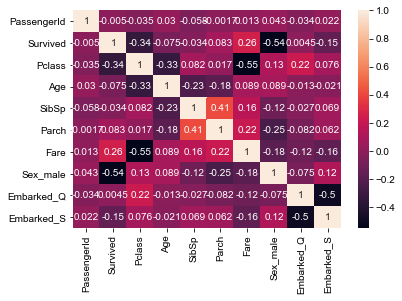

In [33]:
sns.heatmap(train.corr(), annot = True)
sns.set(rc = {'figure.figsize':(12,7)})

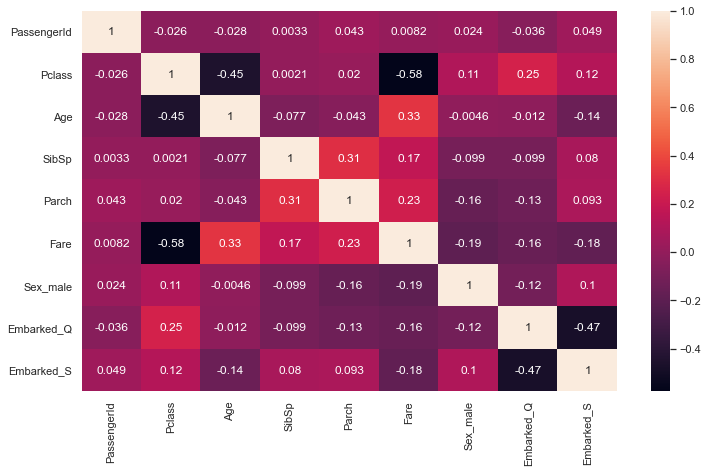

In [34]:
sns.heatmap(test.corr(), annot = True)
sns.set(rc = {'figure.figsize':(12,7)})

### Survived와 상관있는 변수가 적음
 - 살릴 수 있는 변수를 찾아보기(Fare 등)

### 로지스틱 회귀분석

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
target = train['Survived'] #타겟 데이터 : Survived, 따로 저장

In [39]:
train.drop(labels=['Name', 'Survived'], axis=1, inplace=True)

In [40]:
print(train)

     PassengerId  Pclass        Age  SibSp  Parch      Fare  Sex_male  \
0              1       3  22.000000      1      0    7.2500         1   
1              2       1  38.000000      1      0   71.2833         0   
2              3       3  26.000000      0      0    7.9250         0   
3              4       1  35.000000      1      0   53.1000         0   
4              5       3  35.000000      0      0    8.0500         1   
5              6       3  29.642093      0      0    8.4583         1   
6              7       1  54.000000      0      0   51.8625         1   
7              8       3   2.000000      3      1   21.0750         1   
8              9       3  27.000000      0      2   11.1333         0   
9             10       2  14.000000      1      0   30.0708         0   
10            11       3   4.000000      1      1   16.7000         0   
11            12       1  58.000000      0      0   26.5500         0   
12            13       3  20.000000      0      0  

### 학습/테스트 데이터 분리

In [41]:
from sklearn import preprocessing

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train, target, test_size = 0.2, random_state=11) #훈련데이터와 테스테셋 데이터 나누기, train_test_split은 매개변수 미설정 시 훈련데이터, 80%, 테스트 데이터 20%로 분리

In [43]:
#데이터 표준화(04.16 추가)
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [44]:
lr = LogisticRegression() #로지스틱 회귀 인스턴스 생성

In [39]:
lr.fit(X_train, y_train) #훈련 데이터로 모델 훈련

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
x_pred = lr.predict(X_train)

In [41]:
# 로지스틱 모델 학습 성능 비교
y_pred = lr.predict(X_train)

In [42]:
print(train.head(0))
print(lr.coef_)
print(test.head(0))
print(lr.coef_)

Empty DataFrame
Columns: [PassengerId, Pclass, Age, SibSp, Parch, Fare, Sex_male, Embarked_Q, Embarked_S]
Index: []
[[ 7.07989502e-04 -3.33633972e-01 -8.50173064e-03 -1.48197954e-01
  -2.41213404e-01  1.53401403e-02 -2.38522642e+00  1.55436691e-01
   1.56288893e-01]]
Empty DataFrame
Columns: [PassengerId, Pclass, Name, Age, SibSp, Parch, Fare, Sex_male, Embarked_Q, Embarked_S]
Index: []
[[ 7.07989502e-04 -3.33633972e-01 -8.50173064e-03 -1.48197954e-01
  -2.41213404e-01  1.53401403e-02 -2.38522642e+00  1.55436691e-01
   1.56288893e-01]]


### 학습/예측 수행

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
#결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 classifier 클래스 생성#

dt_clf = DecisionTreeClassifier(random_state = 11)
rt_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression()

In [48]:
#Decision Tree 학습/예측/평가#

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도 : 0.719101


In [49]:
#RandomForestClassfier 학습/예측/평가#

rt_clf.fit(X_train, y_train)
rt_pred = rt_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:4}'.format(accuracy_score(y_test, rt_pred)))

RandomForestClassifier 정확도 : 0.7921348314606742


In [50]:
#LogisticRegrssion 학습/예측/평가#

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticReggrestion 정확도 : {0:4}'.format(accuracy_score(y_test, lr_pred)))

LogisticReggrestion 정확도 : 0.8146067415730337


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
#추정계수 확인(04.16 추가)
clf_logi_l2 = LogisticRegression(penalty='l2')
clf_logi_l2.fit(X_train_std, y_train)
print(clf_logi_l2.coef_)

[[ 0.04214456 -0.80305329 -0.47032791 -0.33212719 -0.12125672  0.2312247
  -1.20680691  0.01683334 -0.17935229]]


In [50]:
#데이터 예측
pred_logistic = clf_logi_l2.predict(X_test_std)
print(pred_logistic)

[1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1
 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1
 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0
 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0]


In [52]:
#클래스 확률로 예측
pred_proba = clf_logi_l2.predict_proba(X_test_std)
print(pred_proba)

[[0.33872442 0.66127558]
 [0.93101681 0.06898319]
 [0.30779739 0.69220261]
 [0.40712728 0.59287272]
 [0.82505147 0.17494853]
 [0.84192177 0.15807823]
 [0.5252417  0.4747583 ]
 [0.06223301 0.93776699]
 [0.05870226 0.94129774]
 [0.85246261 0.14753739]
 [0.5527377  0.4472623 ]
 [0.86076471 0.13923529]
 [0.84633404 0.15366596]
 [0.07588098 0.92411902]
 [0.20657908 0.79342092]
 [0.86205889 0.13794111]
 [0.88635419 0.11364581]
 [0.6434797  0.3565203 ]
 [0.05807732 0.94192268]
 [0.9074657  0.0925343 ]
 [0.47135615 0.52864385]
 [0.608802   0.391198  ]
 [0.86358131 0.13641869]
 [0.82889951 0.17110049]
 [0.89490113 0.10509887]
 [0.9009523  0.0990477 ]
 [0.89891663 0.10108337]
 [0.51461509 0.48538491]
 [0.71267704 0.28732296]
 [0.93507818 0.06492182]
 [0.04707542 0.95292458]
 [0.72700913 0.27299087]
 [0.88708773 0.11291227]
 [0.63028581 0.36971419]
 [0.89906444 0.10093556]
 [0.93730549 0.06269451]
 [0.30700586 0.69299414]
 [0.9169543  0.0830457 ]
 [0.89898679 0.10101321]
 [0.90490751 0.09509249]


In [53]:
#정밀도 평가
from sklearn.metrics import precision_score
precision = precision_score(y_test, pred_logistic)
print(precision)

0.8028169014084507


In [54]:
#분류 리포트 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_test, pred_logistic)
print(class_report)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       107
           1       0.80      0.80      0.80        71

    accuracy                           0.84       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.84      0.84      0.84       178



### KFold 교차검증 : 성능향상(레이블 데이터 비율을 맞춰 분류)

In [51]:
from sklearn.model_selection import KFold

In [52]:
def exec_kfold(clf, folds = 5):
    #폴드 세트를 5개인 KFold 객체를 생성, 폴드 수 만큼 예측 결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits = folds)
    scores = []
    
    # K Fold 교차검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(train)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = train.values[train_index], train.values[test_index]
        y_train, y_test = target.values[train_index], target.values[test_index]
        # Classfier 학습/예측/정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도 : {1:4f}'.format(iter_count, accuracy))
        
    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print('평균 정확도 : {0:4}'.format(mean_score))
    
# exec_kfold 호출
exec_kfold(dt_clf, folds = 5)

교차 검증 0 정확도 : 0.646067
교차 검증 1 정확도 : 0.601124
교차 검증 2 정확도 : 0.803371
교차 검증 3 정확도 : 0.786517
교차 검증 4 정확도 : 0.429379
평균 정확도 : 0.653291436551768


In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, train, target, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도 : {1:4f}'.format(iter_count, accuracy))
    
print('평균 정확도 : {0:4f}'.format(np.mean(scores)))

교차 검증 0 정확도 : 0.578652
교차 검증 1 정확도 : 0.803371
교차 검증 2 정확도 : 0.786517
교차 검증 3 정확도 : 0.764045
교차 검증 4 정확도 : 0.830508
평균 정확도 : 0.752619


### 하이퍼 파라미터 튜닝

In [54]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2,3,5,10],
             'min_samples_split' : [2,3,5],
             'min_samples_leaf' : [1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 :{0:4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 or 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClasssifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCV 최고 정확도 :0.803053
테스트 세트에서의 DecisionTreeClasssifier 정확도 : 0.8315


In [ ]:
#ROC 커브 확인

In [63]:
from sklearn.metrics import roc_curve

In [66]:
pred_positive_label = lr.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_positive_label)

print("샘플추출")

print()

thr_idx = np.arange(1, thresholds.shape[0],6)

print('thr idx:', thr_idx)

print('thr thresholds value:',thresholds[thr_idx])

print('thr thresholds value:',fprs[thr_idx])

print('thr thresholds value:',tprs[thr_idx])

샘플추출

thr idx: [ 1  7 13 19 25 31 37 43]
thr thresholds value: [0.98954423 0.78511449 0.65169356 0.5195421  0.33431944 0.23900164
 0.1392268  0.07692806]
thr thresholds value: [0.         0.04672897 0.07476636 0.11214953 0.21495327 0.25233645
 0.70093458 1.        ]
thr thresholds value: [0.01408451 0.3943662  0.64788732 0.73239437 0.77464789 0.87323944
 0.92957746 1.        ]


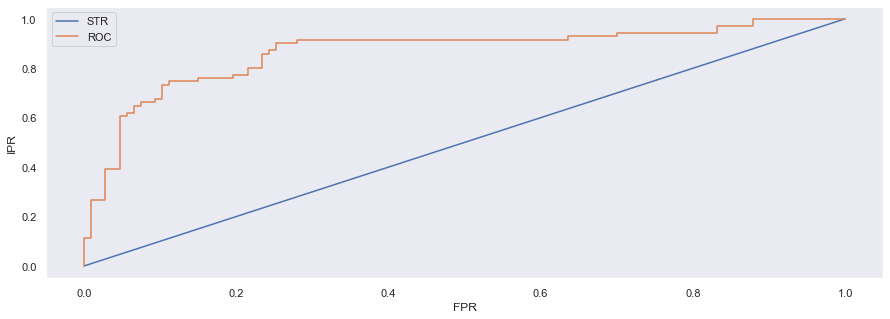

In [68]:
pred_positive_label = lr.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_positive_label)

precision, recalls, thresolds = roc_curve(y_test, pred_positive_label)

plt.figure(figsize=(15,5))

#대각선
plt.plot([0,1],[0,1],label='STR')

#ROC
plt.plot(fprs,tprs,label='ROC')

plt.xlabel('FPR')

plt.ylabel('IPR')

plt.legend()

plt.grid()

plt.show()


In [69]:
#AUC 면적 구하기#

from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

prediction = lr_model.predict(X_test)

print('roc auc value {}'.format(roc_auc_score(y_test,prediction)))

roc auc value 0.8031459786757931


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
